In [1]:
# Step1: Import the required Python libraries
import numpy as np
from matplotlib import pyplot as plt

Step1:
Pada langkah ini, kita mengimpor library yang diperlukan, yaitu numpy dan pyplot dari matplotlib. Library numpy digunakan untuk operasi matematika dan manipulasi array, sedangkan pyplot digunakan untuk membuat plot grafik.

In [2]:
# Step2: Define Activation Function : Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Step2: 
Fungsi sigmoid digunakan sebagai fungsi aktivasi pada jaringan saraf. Fungsi ini mengambil input z dan menghasilkan output antara 0 dan 1 menggunakan rumus 1 / (1 + exp(-z)).

In [3]:
# Step3: Initialize neural network parameters (weights, bias) and define model hyperparame
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1" : W1, "b1": b1,"W2" : W2, "b2": b2}
    return parameters

Step3: 
Pada langkah ini, kita menginisialisasi parameter-parameter jaringan saraf, yaitu bobot (weights) dan bias. Bobot dan bias diinisialisasi secara acak menggunakan distribusi normal. Nilai inputFeatures, neuronsInHiddenLayers, dan outputFeatures digunakan untuk menentukan bentuk bobot dan bias.

In [4]:
# Step4: Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

Step4: 
Langkah ini melakukan forward propagation pada jaringan saraf. Input X dan parameter-parameter jaringan diteruskan melalui lapisan-lapisan jaringan untuk menghitung output prediksi A2. Selain itu, juga menghitung nilai cost (biaya) berdasarkan perbedaan prediksi A2 dengan nilai yang sebenarnya (Y).

In [5]:
# Step5: Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

Step5: 
Langkah ini melakukan backward propagation atau perhitungan gradien. Menggunakan nilai cost dan cache yang dihasilkan pada tahap forward propagation, gradien dari bobot dan bias dihitung menggunakan aturan rantai (chain rule).

In [6]:
# Step6: Update weight and bias parameters
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

Step6: 
Langkah ini mengupdate parameter-parameter jaringan (bobot dan bias) berdasarkan gradien yang dihitung pada tahap backward propagation. Menggunakan nilai gradien dan learning rate, bobot dan bias diperbarui untuk memperbaiki kinerja jaringan.


In [7]:
# Step7: Train the learning model
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

Step7: 
Pada langkah ini, model dilatih dengan mengulang langkah forward propagation, backward propagation, dan update parameter-parameter. Model dilatih untuk mempelajari tabel kebenaran AND. X dan Y digunakan sebagai input dan output yang diinginkan. Jumlah epoch (iterasi) dan learning rate (tingkat pembelajaran) juga ditentukan.

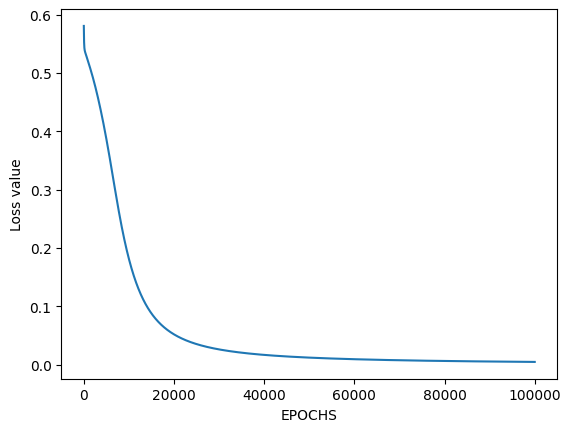

In [8]:
# Step8: Plot Loss value vs Epoch
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

Step8: 
Langkah ini menggunakan library pyplot untuk membuat grafik loss (nilai biaya) terhadap jumlah epoch. Grafik ini menunjukkan seberapa baik model belajar dari waktu ke waktu. Loss yang lebih rendah menunjukkan kinerja yang lebih baik.

In [9]:
# Step9: Test the model performance
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[0. 1. 0. 0.]]


Step9: 
Pada langkah ini, model diuji dengan menggunakan input X yang baru. 
Forward propagation digunakan untuk memprediksi output berdasarkan input yang diberikan. 
Hasil prediksi A2 digunakan untuk menghasilkan nilai prediksi biner (0 atau 1) 
dengan menggunakan threshold 0.5.


Kesimulan:
Kode ini menggambarkan implementasi sederhana dari jaringan saraf untuk mempelajari tabel kebenaran AND. 
Dalam kode tersebut, langkah-langkah dasar dalam pelatihan jaringan saraf, seperti inisialisasi parameter, 
forward propagation, backward propagation, dan pembaruan parameter, diimplementasikan secara terpisah.